In [14]:
# Tutorial from : https://pykeen.readthedocs.io/en/stable/tutorial/first_steps.html
# first steps and getting to know script

import pykeen
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
from pykeen.datasets import CoDExSmall
from pykeen.datasets import OpenBioLink
from pykeen.datasets import Hetionet

In [ ]:
## generated out Dataset under Closed world assumption or open world assumption?
# "Becuase most knowledge graphs are generated under the open world assumption, negative sampling techniques must be employed during the training of knowledge graph embedding models to avoid over-generalization."
## which loss function?
## ->  ablation study
## create own scoring function with Trainable Parameters is possible

## learned embeddings usefull to link prediction, clustering, regression, classification

# KGE == Knowledge Graph Embeddings

Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/129 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/129 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/129 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/129 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/129 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/1.83k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.09s seconds


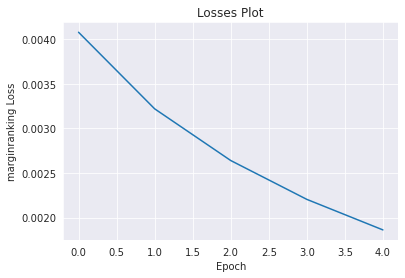

In [12]:
# train and evaluate TransE Model with the pipeline function
# results are sget_tail_prediction_dfPipelineResult instance, which has attributes for the trained model,
# the training loop, and the evaluation.

# all the default arguments written out
pipeline_result = pipeline(

    dataset='CoDExSmall',

    model='TransE',

    training_loop='sLCWA', # negative Sampling

    negative_sampler='basic',
    
    #optimizer_kwargs=dict(lr=1.0e-1),
    
    evaluator='RankBasedEvaluator',
    
    epochs=20 ,
        
    stopper='early',
    
    lr_scheduler='ExponentialLR', #learning rate

    lr_scheduler_kwargs=dict(   
        gamma=0.99, ),
    

)
pipeline_result.plot_losses()
pipeline_result.save_to_directory('CoDExSmall_TransE')

In [ ]:
# Hyper-Parameter-Optimization
from pykeen.hpo import hpo_pipeline

hpo_pipeline_result = hpo_pipeline(
   n_trials=30,
   dataset='CoDExSmall',
   model='TransE',
   loss='MarginRankingLoss',
   model_kwargs_ranges=dict(
        embedding_dim=dict(type=int, low=100, high=500, q=100),
    ),
   loss_kwargs_ranges=dict(
       margin=dict(type=float, low=1.0, high=2.0),
   ),
)

hpo_pipeline_result.plot_losses()
hpo_pipeline_result.save_to_directory('CoDExSmall_Hyper')

In [ ]:
#predicitons
from pykeen.models.predict import get_tail_prediction_df
from pykeen.models.predict import get_all_prediction_df

df = get_tail_prediction_df(pipeline_result.model, 'brazil', 'intergovorgs', triples_factory=pipeline_result.training)
print(df.head(5))

# Score top K triples
top_k_predictions_df = get_all_prediction_df(pipeline_result.model, k=20, triples_factory=pipeline_result.training)
print('\n',top_k_predictions_df)

In [80]:
# Clinical Knowledge Graph Attempt
from pykeen.datasets import CKG # clinical Knowledge Graph

# mapping Entity and Relation IDs to their Labels (Names)
#triples_factory = CKG().training()

clinical_pipeline = pipeline(
    dataset=CKG,
    model='TransE',
    training_loop='sLCWA',
    negative_sampler='basic',
    stopper='early',
    
    
    
)
pipeline_result.plot_losses()
clinical_pipeline.save_to_directory('CKG_transe')

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [13738048, 2669152, 2669153]


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/83412 [00:00<?, ?batch/s]

KeyboardInterrupt: 

In [16]:
# pipeline decompressed for finetuning options: 
# Get a training dataset

from pykeen.datasets import Nations

dataset = Nations()

training_triples_factory = dataset.training


# Pick a model
from pykeen.models import TransE

single_model = TransE(triples_factory=training_triples_factory, loss=None, preferred_device=None, random_seed=None)

# Pick an optimizer from Torch

from torch.optim import Adam

optimizer = Adam(params=model.get_grad_params())

# Pick a training approach (sLCWA or LCWA)

from pykeen.training import SLCWATrainingLoop

training_loop = SLCWATrainingLoop(

    model=single_model,

    triples_factory=training_triples_factory,

    optimizer=optimizer,

)

# Train like Cristiano Ronaldo

_ = training_loop.train(

    triples_factory=training_triples_factory,

    num_epochs=50,

    batch_size=256,

)

# Pick an evaluator

'''from pykeen.evaluation import RankBasedEvaluator

evaluator = RankBasedEvaluator()

# Get triples to test

mapped_triples = dataset.testing.mapped_triples

# Evaluate

results = evaluator.evaluate(

    model=model,

    mapped_triples=mapped_triples,

    batch_size=1024,

    additional_filter_triples=[

        dataset.training.mapped_triples,

        dataset.validation.mapped_triples,

    ],
)
'''

Training epochs on cpu:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

'from pykeen.evaluation import RankBasedEvaluator\n\nevaluator = RankBasedEvaluator()\n\n# Get triples to test\n\nmapped_triples = dataset.testing.mapped_triples\n\n# Evaluate\n\nresults = evaluator.evaluate(\n\n    model=model,\n\n    mapped_triples=mapped_triples,\n\n    batch_size=1024,\n\n    additional_filter_triples=[\n\n        dataset.training.mapped_triples,\n\n        dataset.validation.mapped_triples,\n\n    ],\n)\n'

In [24]:
# testing the trained 
from pykeen.models.predict import get_tail_prediction_df
pr = get_tail_prediction_df(single_model, 'italy', 'duration', triples_factory=training_triples_factory)
print(pr.head(5))

KeyError: 'italy'